# Machine Learning Tutorial #3


### In the following notebook, we implement PCA, K-Means Clustering, Ensembles And Gaussian Mixuture Models! 

In [20]:
# import relevant libraries
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.utils.testing import ignore_warnings
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from numpy import linalg as lin

## Principal Component Analysis 

The following algorithm is used to reduce the dimensionality of your dataset. <br>
Essentially, we extract the "useful" information from lets say 100 predictors, and <br>
put it in new, lets say 5 predictors. <br>
So Alot of useful information still intact, just in alot less features / predictors

In [21]:
# In this tutorial, we work with the MNIST data
with open("/home/tahir/Desktop/Datasets/mnistTVT.pickle", "rb") as f:
    Xtrain, Ttrain, Xval, Tval, Xtest, Ttest = pickle.load(f)

# read in the training datasets as 64-bit floats, to avoid numerical errors
Xtrain = Xtrain.astype(np.float64)
Xval = Xval.astype(np.float64)
Xtest = Xtest.astype(np.float64)

In [22]:
# Print the shapes of each training set to see the split
print(Xtrain.shape)
print(Xval.shape)
print(Xtest.shape)

(50000, 784)
(10000, 784)
(10000, 784)


### Implementing PCA with Sklearn

In [23]:
def my_PCA(train_X,test_X, num_components):
    # Project the MNIST dataset on a 30-dimensional subspace
    pca = PCA(n_components=num_components)  # Reducing the dimensions from 784 to 30 
    # Fit the training data
    pca.fit(Xtrain)

    # Apply the dimensinality reduction on the test data
    reduced_data = pca.transform(Xtest)
    print("The low dimensionality representation is:", reduced_data.shape) 

    # Transform the low-dimensional representation back to original
    # Note that although this is back to higher dimensions, all of the useful information is in the first 30 components
    projected_data = pca.inverse_transform(reduced_data)
    print(f"Projected data from PCA is:{projected_data.shape[1]}, but the information is in {reduced_data.shape[1]} components" )
    
    # Plotting - Reshape the data to illustrate images
    X = np.reshape(projected_data, [-1,28,28])
    plt.figure()

    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(X[i], cmap="Greys")
        plt.axis("off")

    return

### Visualization - Different Number of Components

The low dimensionality representation is: (10000, 10)
Projected data from PCA is:784, but the information is in 10 components
 


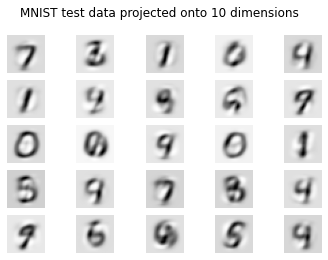

In [24]:
# Call the function and plot it with different num of components 

# 10 dimensions
num_components = 10
my_PCA(Xtrain,Xtest,num_components)
plt.suptitle(f"MNIST test data projected onto {num_components} dimensions" )
print(" ")

In [ ]:
# 30 dimensions
num_components = 30
my_PCA(Xtrain,Xtest,num_components)
plt.suptitle(f" MNIST test data projected onto {num_components} dimensions" )
print(" ")

The low dimensionality representation is: (10000, 30)
Projected data from PCA is:784, but the information is in 30 components


In [ ]:
# 100 dimensions
num_components = 100
my_PCA(Xtrain,Xtest,num_components)
plt.suptitle(f" MNIST test data projected onto {num_components} dimensions" )
print(" ")

In [ ]:
# 300 dimensions
num_components = 300
my_PCA(Xtrain,Xtest,num_components)
plt.suptitle(f" MNIST test data projected onto {num_components} dimensions" )
print(" ")

As we can see, even from 784 to 30 dimensions, the numbers can be seen properly! (Extremely useful in reducing dimensionality of a dataset)

### Implementing PCA from scratch